<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/RepVGG_Making_VGG_style_ConvNets_Great_Again.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RepVGG: Making VGG-style ConvNets Great Again**

논문 링크: https://arxiv.org/abs/2101.03697

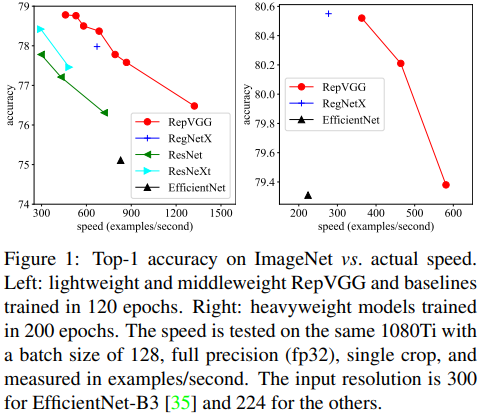

본 논문은 위의 그림 Figure 1을 보면 알 수 있드이 많은 복잡한 model들을 능가하는 VGG style의 achitecture를 가진 RepVGG를 제안한다.

## **RepVGG 구조**

RepVGG는 3 x 3 convolution layer와 ReLU만 사용하며, ResNet 계열에서 사용하는 branch가 없는 plain network이다.

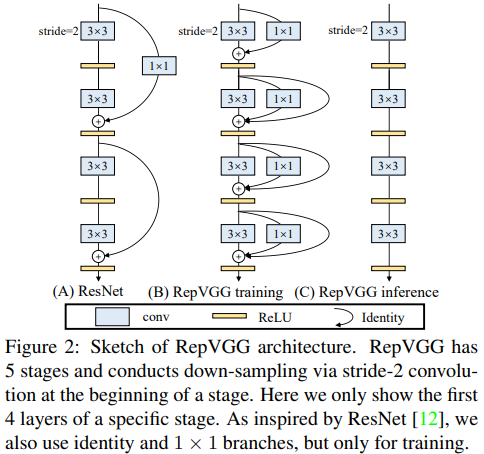

본 논문의 저자는 ResNet 계열에서 사용하는 residual block이 train시에는 gradient vanishing 문제를 해결하지만, inference용으로는 적합지 않다고 주장한다. 따라서 위의 그림 Figure 2에서 (B) 부분과 같이 학습을 진행한 뒤, inference용으로 **structural reparameterization를 진행**하여 (C) 부분과 같이 만든다.

이렇게 하는 것이 과연 무슨 이점이 있을까?

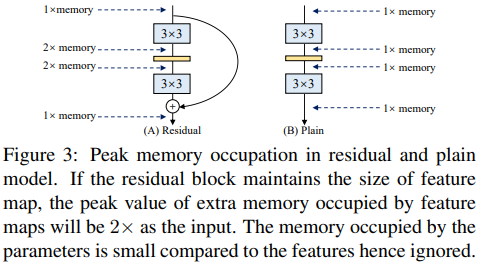

위의 그림 Figure 3을 보면 알 수 있듯이 (A)와 (B) 부분의 차이를 보면 필요한 연산이 적을수록 더 많은 컴퓨터 장치를 칩에 통합할 수 있기 때문에 하드웨어 속도가 더 빨라진다.

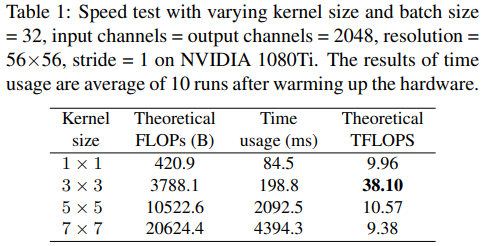

위의 표 Table 1를 보면 3 x 3 kernel size로 이루어졌을 때 얻는 효율성을 수치로 알 수 있다.

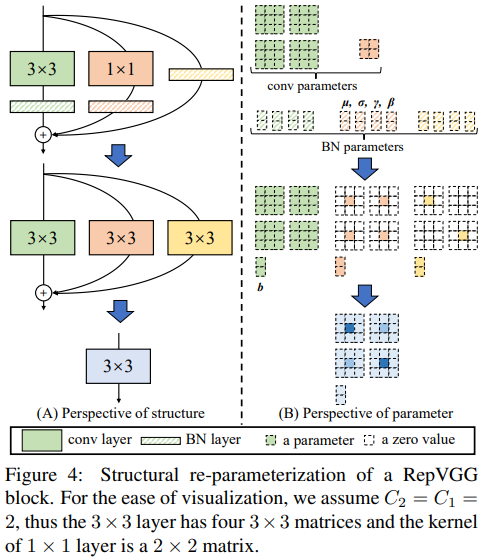

그러면 structural reparameterization는 구체적으로 어떻게 진행이 될까?

먼저, 위의 그림 Figure 4의 (A) 부분을 보면 RegVGG는 각 3 x 3 convolution layer 옆에 1 x 1 convolution layer와 identity branch를 추가했다. 이들은 ReLU를 통과하지 않고 합쳐지므로 즉, 중간에 비선형이 없으므로, 하나의 convolution layer로 합쳐질 수 있다.

구체적인 진행 방법은 identity branch는 identity matrix를 kernel로 가지는 1 x 1 convolution layer와 동일하다. 그리고 1 x 1 convolution layer는 곧 상하좌우 padding이 1씩 들어간 3 x 3 convolution layer와 동일하다. 그리고 convolution - batch normalization은 BN Folding을 통해 하나의 conv와 bias로 해석할 수 있다. 그리고 이제 이 세 개의 3 x 3 convolution layer를 더해 하나의 3 x 3 convolution layer로 만든다.

## **Experiments**

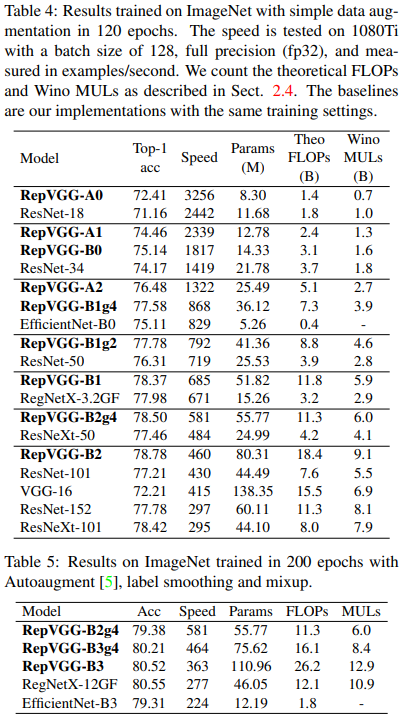

위의 표 Table 4와 Table 5를 보면 성능과 속도, 연산량 등을 알 수 있는데, reparameterization 기법을 통하여 VGG style을 유지하면서도 높은 성능을 유지하며 동시에 빠르기까지 한 것을 알 수 있다.

비록, SOTA 성능을 보이진 않았지만 7년 전에 제안된 VGG가 2021년에 다시금 이렇게 등장한 것이 인상 깊었다.